In [20]:
from math import exp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 导入鸢尾花数据集
from sklearn.datasets import load_iris
# 将数据集切分为训练数据集和测试数据集
from sklearn.model_selection import train_test_split

In [21]:
# data
def create_data():
    iris = load_iris()
    # 将鸢尾花数据集转换成DataFrrame数据结构
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    # 预测目标值为：[0,1,2]
    df['label'] = iris.target
    df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
    # 取出花萼长度，花萼宽度，以及样本标签，三列数据
    data = np.array(df.iloc[:100, [0,1,-1]])
    # print(data)
    return data[:,:2], data[:,-1]

In [23]:
X, y = create_data()
# 切分了数据集，0.7的训练数据，0.3的测试数据
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [25]:
class LogisticReressionClassifier:
    def __init__(self, max_iter=200, learning_rate=0.01):
        # 默认迭代次数为200次
        # 步长为0.01
        self.max_iter = max_iter
        self.learning_rate = learning_rate

    # 压缩函数的定义
    def sigmoid(self, x):
        return 1 / (1 + exp(-x))

    def data_matrix(self, X):
        data_mat = []
        for d in X:
            # *d是元组tuple的unpack操作
            data_mat.append([1.0, *d])
        return data_mat

    def fit(self, X, y):
        # label = np.mat(y)
        data_mat = self.data_matrix(X)  # m*n
        # 初始化系数为0
        # 递归下降时，未知数为w，b
        # b = w_0 * x_0, 其中：x_0 = 1, w_0 = b
        self.weights = np.zeros((len(data_mat[0]), 1), dtype=np.float32)

        for iter_ in range(self.max_iter):
            for i in range(len(X)):
                result = self.sigmoid(np.dot(data_mat[i], self.weights))
                error = y[i] - result
                self.weights += self.learning_rate * error * np.transpose(
                    [data_mat[i]])
        print('LogisticRegression Model(learning_rate={},max_iter={})'.format(
            self.learning_rate, self.max_iter))

    # def f(self, x):
    #     return -(self.weights[0] + self.weights[1] * x) / self.weights[2]

    def score(self, X_test, y_test):
        right = 0
        X_test = self.data_matrix(X_test)
        for x, y in zip(X_test, y_test):
            result = np.dot(x, self.weights)
            if (result > 0 and y == 1) or (result < 0 and y == 0):
                right += 1
        return right / len(X_test)

In [26]:
lr_clf = LogisticReressionClassifier()
lr_clf.fit(X_train, y_train)

LogisticRegression Model(learning_rate=0.01,max_iter=200)


In [27]:
lr_clf.score(X_test, y_test)

1.0

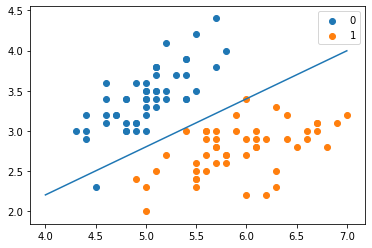

In [28]:
x_ponits = np.arange(4, 8)
y_ = -(lr_clf.weights[1]*x_ponits + lr_clf.weights[0])/lr_clf.weights[2]
plt.plot(x_ponits, y_)

#lr_clf.show_graph()
plt.scatter(X[:50,0],X[:50,1], label='0')
plt.scatter(X[50:,0],X[50:,1], label='1')
plt.legend()